In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [24]:
np.random.seed(42)
data = {
    "Products": np.random.choice(["Product_A", "Product_B", "Product_C"], 100),
    "Sales" : np.random.randint(low=10, high=500, size=(100))
}
np.random.seed(42)
data_region = {
    "Products": np.random.choice(["Product_A", "Product_B", "Product_C"], 100),
    "Region" : np.random.choice(["Region_A", "Region_B", "Region_C"], 100)
}

df = pd.DataFrame(data)
df_region = pd.DataFrame(data_region)

In [26]:
df.head()

,Products,Sales
0,Product_C,145
1,Product_A,481
2,Product_C,72
3,Product_C,148
4,Product_A,90


In [28]:
df_region.head()

,Products,Region
0,Product_C,Region_C
1,Product_A,Region_C
2,Product_C,Region_C
3,Product_C,Region_A
4,Product_A,Region_C


In [30]:
df_inner = df.merge(df_region,how="inner", on="Products")
df_left = df.merge(df_region, how="left", on="Products")
df_outer = df.merge(df_region, how="outer", on="Products")

In [31]:
df_left

,Products,Sales,Region
0,Product_C,145,Region_C
1,Product_C,145,Region_C
2,Product_C,145,Region_A
3,Product_C,145,Region_A
4,Product_C,145,Region_A
...,...,...,...
3341,Product_A,455,Region_C
3342,Product_A,455,Region_B
3343,Product_A,455,Region_C
3344,Product_A,455,Region_B


In [ ]:
df["Revenue"] = df["Sales"].apply(lambda x: x * 0.2)


,Products,Sales,Revenue
0,Product_C,145,29.0
1,Product_A,481,96.2
2,Product_C,72,14.4
3,Product_C,148,29.6
4,Product_A,90,18.0
...,...,...,...
95,Product_A,234,46.8
96,Product_A,394,78.8
97,Product_C,386,77.2
98,Product_A,292,58.4


In [38]:
df["Discount"] = df["Sales"].apply(lambda x: x * 0.1 if x > 1500 else x*0.05)
df

,Products,Sales,Revenue,Discount
0,Product_C,145,29.0,7.25
1,Product_A,481,96.2,24.05
2,Product_C,72,14.4,3.60
3,Product_C,148,29.6,7.40
4,Product_A,90,18.0,4.50
...,...,...,...,...
95,Product_A,234,46.8,11.70
96,Product_A,394,78.8,19.70
97,Product_C,386,77.2,19.30
98,Product_A,292,58.4,14.60


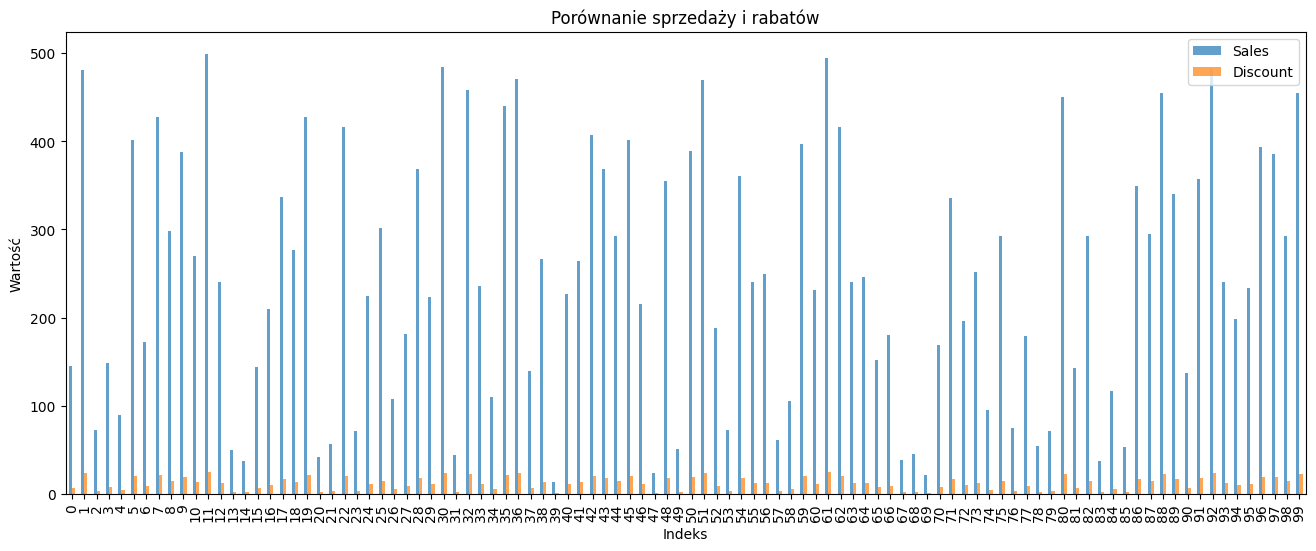

In [43]:
df[["Sales", "Discount"]].plot(kind="bar", figsize=(16, 6), alpha=0.7)
plt.title("Porównanie sprzedaży i rabatów")
plt.xticks(rotation=90)
plt.xlabel("Indeks")
plt.ylabel("Wartość")
plt.show()


In [45]:
df_long = pd.melt(df, id_vars=["Products"], value_vars=["Sales", "Revenue", "Discount"], var_name="Metric", value_name="Value")
df_long

,Products,Metric,Value
0,Product_C,Sales,145.00
1,Product_A,Sales,481.00
2,Product_C,Sales,72.00
3,Product_C,Sales,148.00
4,Product_A,Sales,90.00
...,...,...,...
295,Product_A,Discount,11.70
296,Product_A,Discount,19.70
297,Product_C,Discount,19.30
298,Product_A,Discount,14.60
